### ※ 문제92. 데이터를 정규화 하기 위해서 지금 조인한 result 데이터프레임의 데이터 속성이 어떻게 되는지 확인하시오(df.dtypes)

In [17]:
import pandas as pd

korea_move = pd.read_csv("korea_move2.csv", header = None)
km = korea_move.T
km = km[6:]
km.columns = ['date', 'driving', 'walking']

url = "sample2.html"
url2 = pd.read_html(url)
dcnt = pd.DataFrame(url2[5][2].str.split('+'))[2].str[1].str.split(')').str[0]

d = url2[5][1]
r = pd.DataFrame({'date':d, 'cnt':dcnt})[2:-2]

#r.date = r.date.map(lambda x:x[:-1].replace('월 ', '-')).map(lambda x:'2020-0' + x).map(lambda x:x[0:8] + '0' + x[8] if x[-2] == '-' else x)
r.date = r.date.map(lambda x:'2020-0' + x[x.index('월') - 1] + '-' + x[x.index('월') + 2:x.index('일')].rjust(2, '0'))
result = pd.merge(km, r, on = 'date')

result.dtypes

date       object
driving    object
walking    object
cnt        object
dtype: object

### ※ 문제93. 위의 result 데이터프레임의 데이터를 숫자로 변환하는데 맨 앞에 date column만 빼고 나머지를 전부 숫자로 변환하시오
    문법
        df['DataFrame Column'] = df['DataFrame Column'].astype(float)

In [19]:
result.head()
result[['driving','walking']] = result[['driving','walking']].astype(float)

### ※ 문제94. 아래의 1,062 -> 1062로 변경되게 하시오

In [23]:
import re
for k, i in enumerate(result['cnt']):
    result['cnt'][k] = re.sub('[^0-9]','',i)
result['cnt']=result['cnt'].astype(int)
result

C:\Users\knitwill\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,date,driving,walking,cnt
0,2020-01-20,108.45,108.11,1
1,2020-01-24,132.50,103.55,1
2,2020-01-26,119.25,105.85,1
3,2020-01-27,101.94,100.29,1
4,2020-01-30,104.55,109.83,1
...,...,...,...,...
159,2020-07-07,71.29,47.85,44
160,2020-07-08,72.19,47.82,62
161,2020-07-09,71.53,44.90,50
162,2020-07-10,96.12,71.88,45


### ※ 문제95. 위의 result 데이터 중 날짜만 빼고 나머지 3개의 컬럼을 정규화 하시오

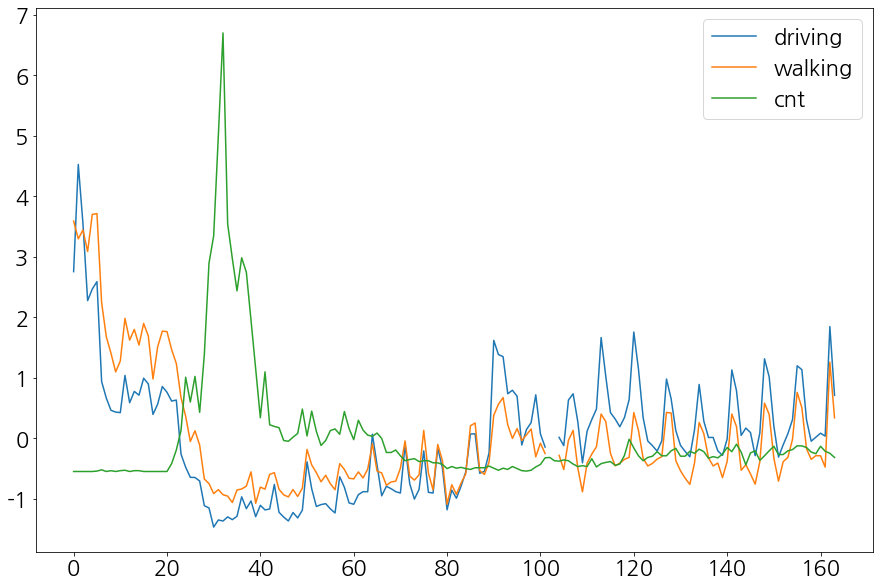

In [40]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,10)
plt.rcParams.update({'font.size': 22})

X=result[['driving','walking','cnt']]
X=preprocessing.StandardScaler().fit(X).transform(X)
date = result.date
df = pd.DataFrame(X)
rs = pd.concat([date,df],axis=1)
rs.columns = ['date','driving','walking','cnt']
rs.plot.line()

## <b>■ Pandas 내장 그래프 도구 활용 (p.98)</b>
    Pandas 내장 그래프 사용하는 문법 
        df.plot.bar()      : 막대그래프
        df.plot.pie()      : 원형그래프
        df.plot.scatter()  : 산점도그래프
        df.plot.line()     : 라인그래프
        df.plot.box()      : 박스그래프
        df.plot.his()      : 히스토그램 그래프
        

### ※ 문제96. 위의 점심시간 코로나 그래프의 x축에 날짜를 주시오

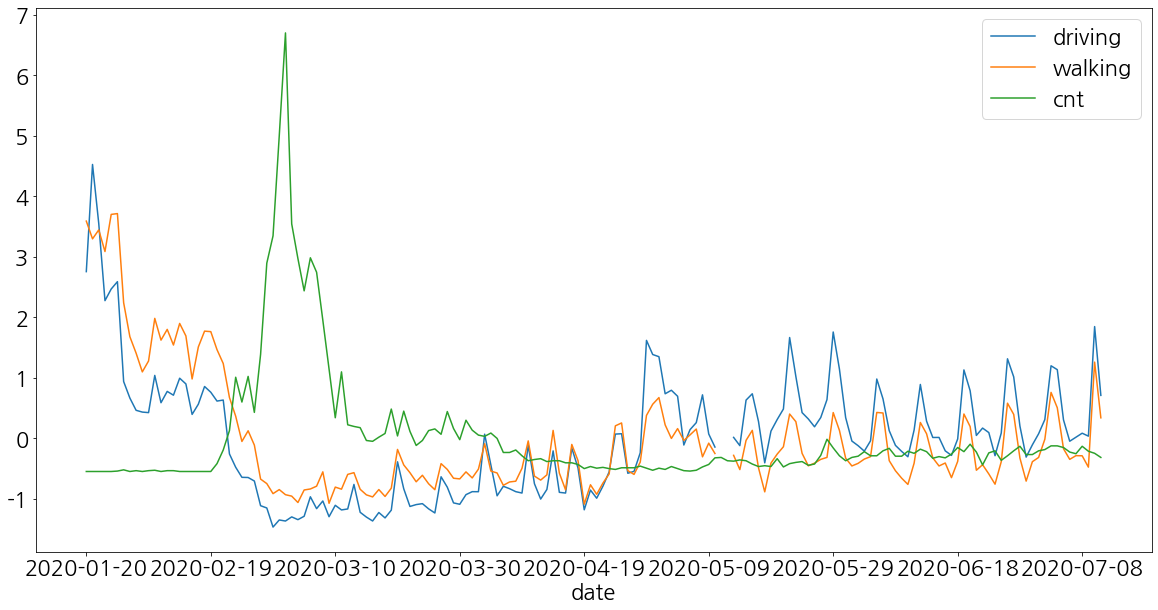

In [44]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams.update({'font.size': 22})

date = result.date
X=result[['driving','walking','cnt']]
X=preprocessing.StandardScaler().fit(X).transform(X)
df = pd.DataFrame(X)
rs = pd.concat([date,df],axis=1)
rs.columns = ['date','driving','walking','cnt']
rs.plot.line(x='date')

### ※ 문제97. 위의 결과로 보면 $x$축의 날짜가 겹쳐서 출력되므로 겹치지 않도록 좀 더 그래프의 사이즈를 늘리시오

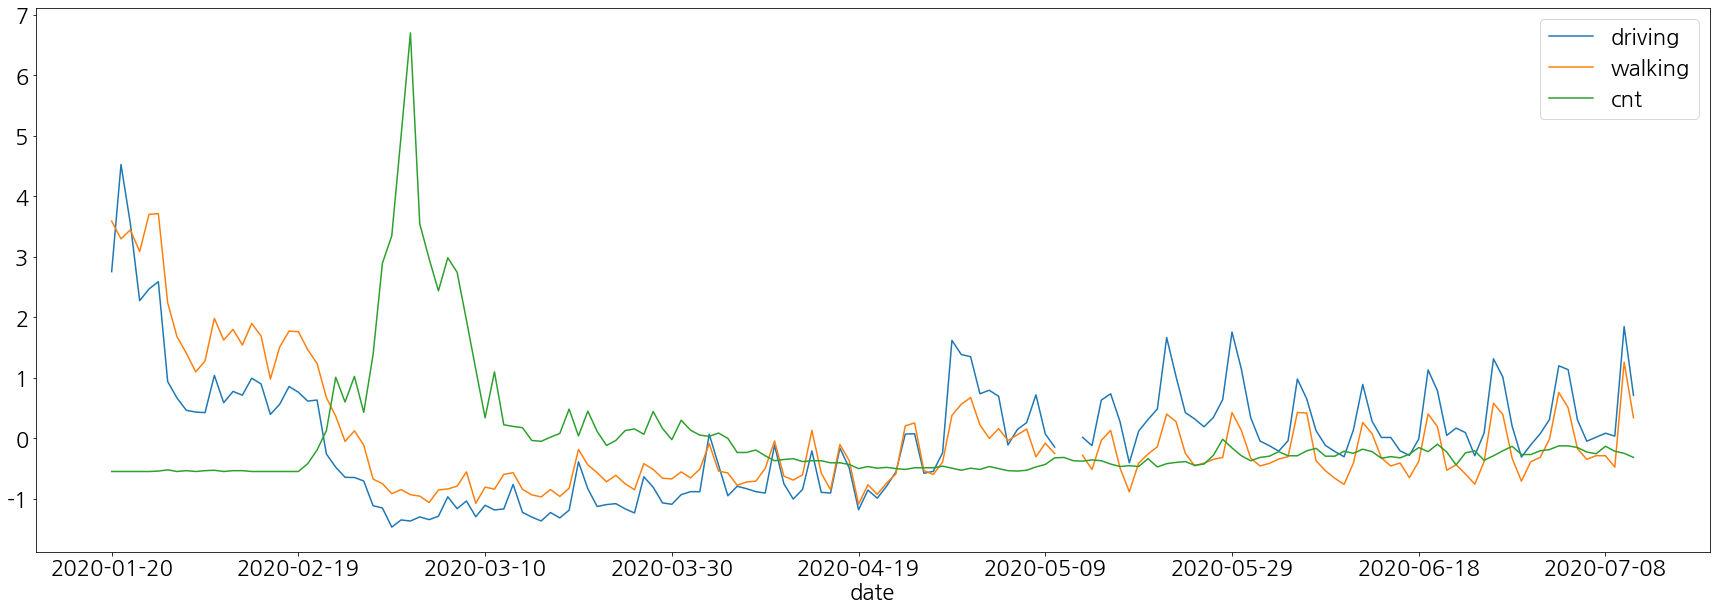

In [43]:
from sklearn import preprocessing
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (30,10)
plt.rcParams.update({'font.size': 22})

date = result.date
X=result[['driving','walking','cnt']]
X=preprocessing.StandardScaler().fit(X).transform(X)
df = pd.DataFrame(X)
rs = pd.concat([date,df],axis=1)
rs.columns = ['date','driving','walking','cnt']
rs.plot.line(x='date')

### ※ (점심시간 문제) 사람들의 이동성이 높을 수록 코로나 확진자수는 증가하는가? 
    다음과 같이 시각화 하세요 ~  cnt 가 일별 확진자 수입니다. 
    영향력만 확인할것이므로 데이터를 정규화 해야합니다

In [3]:
import pandas as pd

korea_move = pd.read_csv("korea_move2.csv", header = None)
km = korea_move.T
km = km[6:]
km.columns = ['date', 'driving', 'walking']

url = "sample2.html"
url2 = pd.read_html(url)
dcnt = pd.DataFrame(url2[5][2].str.split('+'))[2].str[1].str.split(')').str[0]

d = url2[5][1]
r = pd.DataFrame({'date':d, 'cnt':dcnt})[2:-2]

#r.date = r.date.map(lambda x:x[:-1].replace('월 ', '-')).map(lambda x:'2020-0' + x).map(lambda x:x[0:8] + '0' + x[8] if x[-2] == '-' else x)
r.date = r.date.map(lambda x:'2020-0' + x[x.index('월') - 1] + '-' + x[x.index('월') + 2:x.index('일')].rjust(2, '0'))
result = pd.merge(km, r, on = 'date')



           date driving walking cnt
0    2020-01-20  108.45  108.11   1
1    2020-01-24   132.5  103.55   1
2    2020-01-26  119.25  105.85   1
3    2020-01-27  101.94  100.29   1
4    2020-01-30  104.55  109.83   1
..          ...     ...     ...  ..
159  2020-07-07   71.29   47.85  44
160  2020-07-08   72.19   47.82  62
161  2020-07-09   71.53    44.9  50
162  2020-07-10   96.12   71.88  45
163  2020-07-11   80.68   57.57  35

[164 rows x 4 columns]


In [12]:
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,10)
plt.rcParams.update({'font.size': 22})

daily_c = pd.read_csv('cov0713.csv')
k_move = pd.read_csv('korea_move.csv',encoding='ANSI') # ANSI 코딩으로 불러오기
del k_move['alternative_name'] # 이상한 글씨 삭제

## k_move 설정
k_move = k_move.T[5:] # 전치 후 6행부터 저장
k_move['date']=k_move.index # index에 있는 날짜 column으로 지정
k_move.columns=['driving','walking','date'] # merge용 column명 변경
k_move=k_move[['date','driving','walking']] # column 순서 변경

## 일별 확진자 설정
mod = pd.Series(daily_c['date']) # Series로 따로 생성
m1=mod.str.partition('월') # '월'로 1차 분리
m2=m1[2].str.partition('일') # '일'로 2차 분리
mod_m=pd.concat([m1[0],m2[0]],axis=1)
mod_m.columns=['m','d'] # column명 수정
mod_m['y']='2020-0' # 년도 column 생성
mod_date='2020-0'+mod_m['m']+'-'+mod_m['d'].str.strip() # 각 column 병합 후 새로 생성, 'd' column 공백 제거
daily_c['date']=mod_date # date 수정한 column 추가

## 병합
rs=pd.merge(k_move, daily_c, on='date',how='right')
rs=rs[['date','driving','walking','daily confirmed']] # column 순서 변경
rs.dtypes

date               object
driving            object
walking            object
daily confirmed    object
dtype: object

In [16]:
rs[['driving','walking']]=rs[['driving','walking']].astype('float')